In [1]:
# Import important libarery 
import pandas as pd
import numpy as np

# import dataset and add columm names to the imporated dataset
data = pd.read_csv('https://github.com/abdo-projects/data-science-portfolio/raw/main/Dataset/google_covid_dataset.csv')


# Show the the tope 5 obersrvation of the datasets
data.head(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [2]:
# Map True/False to 1/0 in DataFrame
for col in data.columns[:-1]:
  data[col] = data[col].astype(bool)

# Show the the tope 5 obersrvation of the dataset
data.head(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,True,True,True,True,True,False,True,True,True,True,...,True,False,True,False,False,False,False,False,True,China
1,True,True,True,True,True,False,True,True,True,True,...,True,False,True,False,False,False,False,True,False,China
2,True,True,True,True,True,False,True,True,True,True,...,True,False,True,False,False,False,True,False,False,China
3,True,True,True,True,True,False,True,True,True,True,...,True,False,False,True,False,False,False,False,True,China
4,True,True,True,True,True,False,True,True,True,True,...,True,False,False,True,False,False,False,True,False,China


In [3]:
#show the number of attributes and observationsdata.shape
data.shape

(316800, 27)

In [4]:
# create a column with null values 
df = data.copy(deep = True)
df['merged'] = None

# merge Contact_Yes and Country colunms into a new colunms
for ind in df.index:
  if df['Contact_Yes'][ind] == True:
    df['merged'][ind] = df['Country'][ind]+'_True'
  if df['Contact_Yes'][ind] == False:
    df['merged'][ind] = df['Country'][ind]+'_Flase'

# Show the the tope 5 obersrvation of the dataset
df.head(5)

<ipython-input-4-056dd5b80926>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['merged'][ind] = df['Country'][ind]+'_True'
<ipython-input-4-056dd5b80926>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['merged'][ind] = df['Country'][ind]+'_Flase'


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country,merged
0,True,True,True,True,True,False,True,True,True,True,...,False,True,False,False,False,False,False,True,China,China_True
1,True,True,True,True,True,False,True,True,True,True,...,False,True,False,False,False,False,True,False,China,China_Flase
2,True,True,True,True,True,False,True,True,True,True,...,False,True,False,False,False,True,False,False,China,China_Flase
3,True,True,True,True,True,False,True,True,True,True,...,False,False,True,False,False,False,False,True,China,China_True
4,True,True,True,True,True,False,True,True,True,True,...,False,False,True,False,False,False,True,False,China,China_Flase


In [5]:
# Convert categorical variable to numeric
cleanup_nums = {"Gender_Female": {False: "Gender_Female_False", True: "Gender_Female_True"},
                "Gender_Male": {False: "Gender_Male_False", True: "Gender_Male_True"},
                "Gender_Transgender": {False: "Gender_Transgender_False", True: "Gender_Transgender_True" },
                "Severity_Mild": {False: "Severity_Mild_False", True: "Severity_Mild_True" },
                "Severity_Moderate": {False: "Severity_Moderate_False", True: "Severity_Moderate_True" },
                "Severity_None": {False: "Severity_None_False", True: "Severity_None_True" },
                "Severity_Severe": {False: "Severity_Severe_False", True: "Severity_Severe_True" }}

df.replace(cleanup_nums, inplace=True)
df.head(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country,merged
0,True,True,True,True,True,False,True,True,True,True,...,Gender_Transgender_False,Severity_Mild_True,Severity_Moderate_False,Severity_None_False,Severity_Severe_False,False,False,True,China,China_True
1,True,True,True,True,True,False,True,True,True,True,...,Gender_Transgender_False,Severity_Mild_True,Severity_Moderate_False,Severity_None_False,Severity_Severe_False,False,True,False,China,China_Flase
2,True,True,True,True,True,False,True,True,True,True,...,Gender_Transgender_False,Severity_Mild_True,Severity_Moderate_False,Severity_None_False,Severity_Severe_False,True,False,False,China,China_Flase
3,True,True,True,True,True,False,True,True,True,True,...,Gender_Transgender_False,Severity_Mild_False,Severity_Moderate_True,Severity_None_False,Severity_Severe_False,False,False,True,China,China_True
4,True,True,True,True,True,False,True,True,True,True,...,Gender_Transgender_False,Severity_Mild_False,Severity_Moderate_True,Severity_None_False,Severity_Severe_False,False,True,False,China,China_Flase


In [6]:
#show the number of attributes and observationsdata.shape
df.shape

(316800, 28)

In [7]:
# Create a copy of the df and shuffle it
df_shuffle = df.copy(deep = True)
df_shuffle = df_shuffle.sample(frac=1).reset_index(drop=True)

# Show the the tope 5 obersrvation of the dataset
df_shuffle.head(15)



,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country,merged
0,False,False,False,True,True,False,False,False,False,False,...,Gender_Transgender_False,Severity_Mild_False,Severity_Moderate_False,Severity_None_False,Severity_Severe_True,False,True,False,China,China_Flase
1,False,True,True,True,False,False,False,False,True,True,...,Gender_Transgender_False,Severity_Mild_True,Severity_Moderate_False,Severity_None_False,Severity_Severe_False,False,True,False,China,China_Flase
2,True,True,True,True,True,False,True,False,False,False,...,Gender_Transgender_False,Severity_Mild_False,Severity_Moderate_False,Severity_None_True,Severity_Severe_False,False,True,False,Other-EUR,Other-EUR_Flase
3,True,True,True,True,True,False,True,False,False,False,...,Gender_Transgender_True,Severity_Mild_False,Severity_Moderate_True,Severity_None_False,Severity_Severe_False,False,False,True,Italy,Italy_True
4,True,True,True,True,True,False,False,True,False,False,...,Gender_Transgender_True,Severity_Mild_False,Severity_Moderate_False,Severity_None_True,Severity_Severe_False,True,False,False,Iran,Iran_Flase
5,False,True,True,True,False,False,False,True,False,False,...,Gender_Transgender_True,Severity_Mild_False,Severity_Moderate_True,Severity_None_False,Severity_Severe_False,False,True,False,Germany,Germany_Flase
6,True,True,True,True,True,False,False,False,False,False,...,Gender_Transgender_False,Severity_Mild_False,Severity_Moderate_True,Severity_None_False,Severity_Severe_False,False,True,False,Other-EUR,Other-EUR_Flase
7,False,True,True,False,False,False,True,True,True,True,...,Gender_Transgender_False,Severity_Mild_False,Severity_Moderate_False,Severity_None_False,Severity_Severe_True,True,False,False,France,France_Flase
8,False,False,True,True,False,False,False,False,True,False,...,Gender_Transgender_False,Severity_Mild_False,Severity_Moderate_False,Severity_None_False,Severity_Severe_True,False,True,False,Iran,Iran_Flase
9,False,False,True,False,False,False,True,False,False,False,...,Gender_Transgender_True,Severity_Mild_False,Severity_Moderate_False,Severity_None_True,Severity_Severe_False,False,False,True,France,France_True


In [8]:
#select feature columns from dataset
null_data = df_shuffle.iloc[:,:]

# find null vule for all attributes and sum totall number
null_data.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
merged                     0
dtype: int64

In [9]:
# Create a copy of dataframe for objective 1 and save the file as csv
col_obj1 = ['Gender_Female','Gender_Male','Gender_Transgender']
df_obj1 = df_shuffle[col_obj1].copy(deep = True)
df_obj1.to_csv('df_obj1.csv',index=False,header=False,sep=',')

# Create a copy of dataframe for objective 2 and save the file as csv
col_obj2 = ['Severity_Mild','Severity_Moderate','Severity_None','Severity_Severe']
df_obj2 = df_shuffle[col_obj2].copy(deep = True)
df_obj2.to_csv('df_obj2.csv',index=False,header=False,sep=',')

# Create a copy of dataframe for objective 3 and save the file as csv
col_obj3 = ['merged']
df_obj3 = df_shuffle[col_obj3].copy(deep = True)
df_obj3.to_csv('df_obj3.csv',index=False,header=False,sep=',')


<AxesSubplot:xlabel='merged', ylabel='count'>

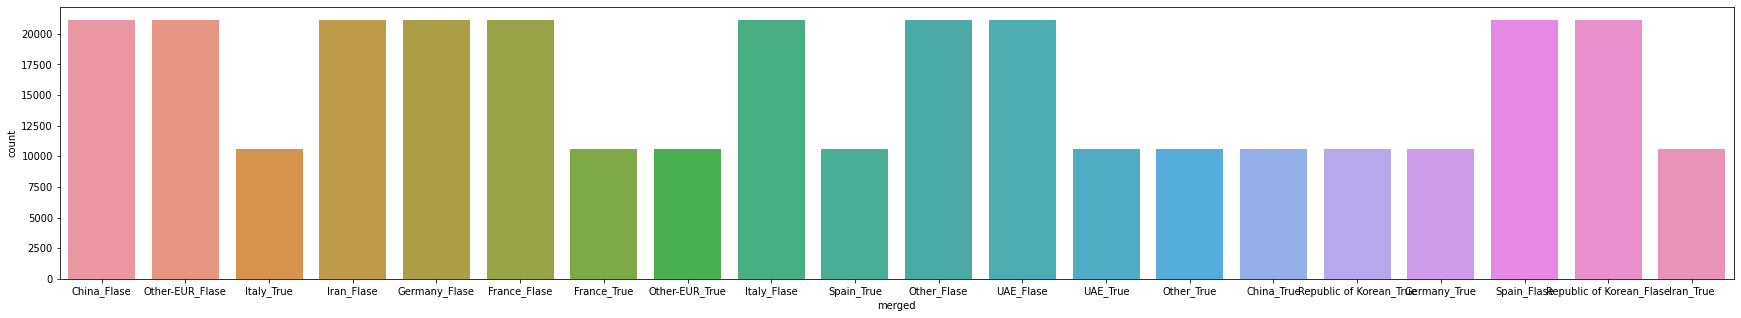

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,5))
# count rows of each classes
sns.countplot(x="merged", data=df_shuffle)

In [11]:
# count class lables
for i in df_obj3.columns:
    print('Attribute name:',i)
    print('-------------------')
    print(df_obj3[i].value_counts())
    print('-------------------')

Attribute name: merged
-------------------
China_Flase                 21120
Italy_Flase                 21120
Republic of Korean_Flase    21120
Spain_Flase                 21120
UAE_Flase                   21120
Other-EUR_Flase             21120
Other_Flase                 21120
France_Flase                21120
Germany_Flase               21120
Iran_Flase                  21120
Other-EUR_True              10560
France_True                 10560
Spain_True                  10560
UAE_True                    10560
Other_True                  10560
China_True                  10560
Republic of Korean_True     10560
Germany_True                10560
Italy_True                  10560
Iran_True                   10560
Name: merged, dtype: int64
-------------------


In [12]:
df_obj3.head(15)

,merged
0,China_Flase
1,China_Flase
2,Other-EUR_Flase
3,Italy_True
4,Iran_Flase
5,Germany_Flase
6,Other-EUR_Flase
7,France_Flase
8,Iran_Flase
9,France_True
